In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


from src.data.data_fetcher import get_all_features, get_raw_data
from src.features.feature_engineering import prepare_data
from src.features.preprocess_data import get_preprocessed_test_data, fetch_preprocessed_data
pd.set_option('display.max_columns', 200)


from sklearn.metrics import mean_absolute_error


%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()


X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()

X_train_obs_combined.head()


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour
93098,4.4,1.27800,38284.226562,18.150000,438.274994,0.0,271.849976,9.400001,19702.500000,0.000,0.000000,100.000000,3.450,0.000,5.800,1.625,2.550,1.0,1.0,1007.150024,0.0075,0.75,991.349976,997.599976,0.000000,0.0,92.250000,1003.875000,3.55,0.0,0.0,0.250,166.632751,2.413250,0.000,273.350006,100.000000,6140.875000,2.45,1.400,1.975,0.0,0,0,1,-0.107308,0.994226,0.500000,-0.866025
93170,2.5,1.29550,40293.773438,18.950001,1274.599976,-0.5,264.750000,12.975000,28473.625000,0.000,0.000000,97.724998,0.275,0.275,0.275,0.275,0.275,1.0,1.0,999.400024,0.0375,5.00,983.650024,989.925049,27.950001,0.0,71.699997,996.250000,3.40,0.0,0.0,0.100,166.282501,2.512000,0.125,272.825012,97.875000,18812.425781,1.30,0.975,0.800,0.0,0,0,1,-0.055879,0.998438,0.500000,-0.866025
34577,1.8,1.32875,210171.046875,63.474998,743.900024,0.0,260.750000,29.400000,115232.921875,4.425,32189.599609,99.724998,0.000,0.000,0.000,0.000,0.000,1.0,0.0,1012.599976,0.0000,0.00,998.799988,1005.299988,0.000000,0.0,76.375000,1011.799988,15.10,0.0,0.0,0.000,178.420746,6.473750,0.200,266.674988,99.724998,39488.875000,1.10,-0.950,0.550,0.0,0,1,0,0.337301,0.941397,0.258819,-0.965926
34646,1.9,1.32400,904.349976,2.375000,927.349976,0.0,261.700012,1.725000,3090.175049,0.000,0.000000,98.824997,0.300,0.075,0.300,0.300,0.300,0.5,1.0,1009.349976,0.0000,0.00,995.750000,1002.200012,0.000000,0.0,74.000000,1008.700012,15.00,0.0,0.0,0.125,136.377502,-0.514500,0.075,267.850006,99.599998,37382.398438,0.90,-0.400,0.750,0.0,0,1,0,0.385413,0.922744,0.866025,-0.500000
85456,0.9,1.40200,0.000000,0.000000,28.075001,0.0,253.500000,0.000000,0.000000,0.000,0.000000,0.700000,0.000,0.000,0.000,0.000,0.000,0.0,1.0,1033.250000,0.0000,0.00,1016.625000,1023.424988,0.000000,0.0,56.575001,1030.275024,7.20,0.0,0.0,0.000,337.882996,-39.363503,0.000,262.850006,0.700000,41939.050781,1.55,-0.350,1.525,0.0,0,0,1,0.635068,0.772456,-0.500000,0.866025


In [9]:
reg = xgb.XGBRegressor(n_estimators=10000,
                       early_stopping_rounds=50,
                       learning_rate= 0.0001)
reg.fit(X_train_obs_combined, y_train_obs_combined,
        eval_set=[(X_train_obs_combined, y_train_obs_combined), (X_val_obs_combined, y_val_obs_combined)],
                  verbose=True
        )

[0]	validation_0-rmse:112.07283	validation_1-rmse:96.68181


[1]	validation_0-rmse:111.98459	validation_1-rmse:96.60060
[2]	validation_0-rmse:111.89643	validation_1-rmse:96.51947
[3]	validation_0-rmse:111.80835	validation_1-rmse:96.43843
[4]	validation_0-rmse:111.72035	validation_1-rmse:96.35747
[5]	validation_0-rmse:111.63243	validation_1-rmse:96.27661
[6]	validation_0-rmse:111.54459	validation_1-rmse:96.19583
[7]	validation_0-rmse:111.45682	validation_1-rmse:96.11515
[8]	validation_0-rmse:111.36914	validation_1-rmse:96.03454
[9]	validation_0-rmse:111.28153	validation_1-rmse:95.95402
[10]	validation_0-rmse:111.19400	validation_1-rmse:95.87360
[11]	validation_0-rmse:111.10655	validation_1-rmse:95.79326
[12]	validation_0-rmse:111.01918	validation_1-rmse:95.71301
[13]	validation_0-rmse:110.93188	validation_1-rmse:95.63283
[14]	validation_0-rmse:110.84588	validation_1-rmse:95.55574
[15]	validation_0-rmse:110.75873	validation_1-rmse:95.47575
[16]	validation_0-rmse:110.67288	validation_1-rmse:95.39883
[17]	validation_0-rmse:110.58711	validation_1-rms

c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is

[24]	validation_0-rmse:109.98517	validation_1-rmse:94.77775
[25]	validation_0-rmse:109.90002	validation_1-rmse:94.70167
[26]	validation_0-rmse:109.81496	validation_1-rmse:94.62540
[27]	validation_0-rmse:109.72997	validation_1-rmse:94.54923
[28]	validation_0-rmse:109.64378	validation_1-rmse:94.47034
[29]	validation_0-rmse:109.55895	validation_1-rmse:94.39434
[30]	validation_0-rmse:109.47420	validation_1-rmse:94.31873
[31]	validation_0-rmse:109.38823	validation_1-rmse:94.24009
[32]	validation_0-rmse:109.30363	validation_1-rmse:94.16437
[33]	validation_0-rmse:109.21911	validation_1-rmse:94.08875
[34]	validation_0-rmse:109.13336	validation_1-rmse:94.01036
[35]	validation_0-rmse:109.04900	validation_1-rmse:93.93491
[36]	validation_0-rmse:108.96471	validation_1-rmse:93.85957
[37]	validation_0-rmse:108.87918	validation_1-rmse:93.78143
[38]	validation_0-rmse:108.79504	validation_1-rmse:93.70626
[39]	validation_0-rmse:108.71099	validation_1-rmse:93.63147
[40]	validation_0-rmse:108.62701	validat

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 10000x10000 with 0 Axes>

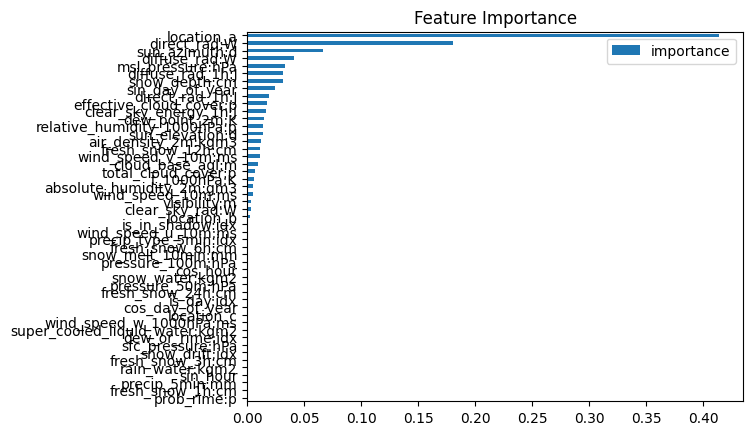

In [10]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=["importance"])

plt.figure(figsize=(100,100))
fi.sort_values("importance").plot(kind="barh", title="Feature Importance")
plt.show()

In [11]:
y_pred_val_obs_combined = reg.predict(X_val_obs_combined)
y_pred_val_est_combined = reg.predict(X_val_est_combined)

# Evaluate the model's performance using Mean Absolute Error (MAE) on the combined validation observed data
mae_obs_combined = mean_absolute_error(y_val_obs_combined, y_pred_val_obs_combined)
mae_est_combined = mean_absolute_error(y_val_est_combined, y_pred_val_est_combined)
print('MAE on validation observed data: ', mae_obs_combined)
print('MAE on validation estimated data: ', mae_est_combined)


MAE on validation observed data:  9.91489482538692
MAE on validation estimated data:  16.95346633701528


c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is

In [6]:
# Predict on the cleaned validation set
from src.features.preprocess_data import get_final_prediction


y_val_pred_est_a = reg.predict(X_test_estimated_a_processed)
y_val_pred_est_b = reg.predict(X_test_estimated_b_processed)
y_val_pred_est_c = reg.predict(X_test_estimated_c_processed)

# Combine the predictions into a single array
y_pred_test_est_combined = get_final_prediction(y_val_pred_est_a, y_val_pred_est_b, y_val_pred_est_c)
y_pred_test_est_combined.shape

from src.models.saving import save_predictions


save_predictions(y_pred_test_est_combined, 'gradient_boost_with_time_features_and_location_normalised_trig_time')


c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is

   id  prediction
0   0    5.930658
1   1    5.930658
2   2    5.930658
3   3    5.930658
4   4   54.527988
